# German Credit Card Fraud

**Data source:** UCI machine learning library, found [here](http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29).

**Project purpose:**
I am enrolled in the Data Science with Python module under the Thinkful bootcamp program. The project represents a simulation of fraud detection for adding to my project portfolio. An open dataset allowed me to practice applying machine learning algorithms through the prediction modeling process. Classification of good and bad credit card customers for fraud detection can be done in different ways. I chose one method of solving the problem, but there are many others such as different models and oversampling techniques.  

**Business Case:**
Simulating a fraud case, increasing accuracy, precision and recall remain the objectives. Precision is important because I want to predict all the bad creditors labels to be true. Recall for not mislabeling any good creditors accidentally as bad. 

**Cases to avoid:**
I am not interested in decreasing processing time like helping the algorithm converge because the code is not meant to be scaled into production. 

**Software:** 
Python with packages sklearn, pandas, numpy, and others. 

**Machine learning problem:**
supervised learning - classification based on 20 variables

**Algorithm:**
Logistic regression

## Glossary 
1. Import 
  1. Dataset 
  2. Packages
2. Data exploration
  1. Summary statistics
  2. Visualizations
3. Data preparation
  1. Convert class labels to (0, 1)
  2. Convert categorical variables to binary
4. Model building
5. Model evaluation
6. Data preparation pt. 2
  1. Oversampling
7. Model building pt. 2 
8. Model evaluation pt. 2
9. Study conclusion
  1. Compare models with evaluation plots
10. Additional notes

## 1. Imports 

### 1a. Import packages 

In [1]:
%matplotlib inline 
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
pylab.rcParams['figure.figsize'] = 14, 10
import pandas as pd
import sklearn.linear_model as ln
import numpy as np
from sklearn.cross_validation import cross_val_score
from unbalanced_dataset import SMOTE

### 1b. Import Data

The data comes from the UCI repository, but does not have a link for downloading the .csv file. I copied and pasted the data found from the following link into and .xlsx file. With the data in the .xlsx file, I used delimiter for separating the columns by space and typed in each column name. I decided on leaving the categorical value names in instead of replacing with the original names. 

In [2]:
german_credit = pd.read_csv('German.csv')

## 2. Data Exploration

### 2a. Summary Statistics

In [3]:
#Dimension of dataset
german_credit.shape

(1000, 21)

1000 rows by 21 columns

In [4]:
#Column datatypes
german_credit.dtypes

Status checking            object
Duration                    int64
Credit history             object
Purpose                    object
Credit amount               int64
Savings account/bonds      object
Present employment         object
Installment rate            int64
Personal status/sex        object
Debtors/guarantors         object
Present resident since      int64
Property                   object
Age                         int64
Other installment plans    object
Housing                    object
Number existing credits     int64
Job                        object
Number of people liable     int64
Telephone                  object
Foreign worker             object
Classification              int64
dtype: object

13 categorical values and 7 numeric (excluding the class label)

In [5]:
#Number of NaN values in each column
german_credit.notnull().sum()

Status checking            1000
Duration                   1000
Credit history             1000
Purpose                    1000
Credit amount              1000
Savings account/bonds      1000
Present employment         1000
Installment rate           1000
Personal status/sex        1000
Debtors/guarantors         1000
Present resident since     1000
Property                   1000
Age                        1000
Other installment plans    1000
Housing                    1000
Number existing credits    1000
Job                        1000
Number of people liable    1000
Telephone                  1000
Foreign worker             1000
Classification             1000
dtype: int64

No NaN values found in dataset

Summary statistics of the numeric variables, including the classification label

In [6]:
#Summary statistics
german_credit.describe()

,Duration,Credit amount,Installment rate,Present resident since,Age,Number existing credits,Number of people liable,Classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


### 2b. Visualizations

Histograms of numeric variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107e2eba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x107cb2278>]], dtype=object)

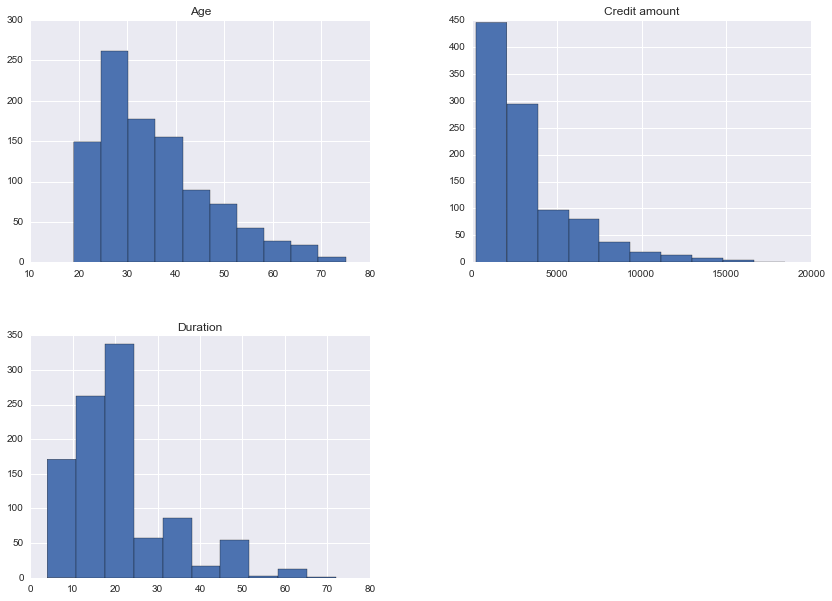

In [7]:
german_credit[['Age', 'Credit amount', 'Duration']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10accffd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10afbbeb8>]], dtype=object)

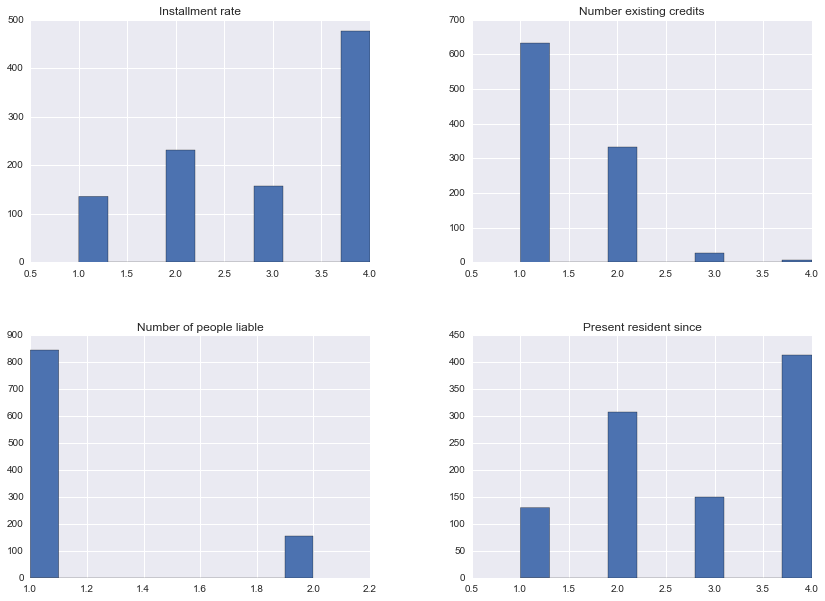

In [48]:
german_credit[['Number of people liable', 'Number existing credits', 
             'Present resident since', 'Installment rate']].hist()

1. Categorical value descriptions:
  1. Number of factors in each variable
  1. Descriptions of each factor

Status of existing checking account 
- A11 : ... < 0 DM 
- A12 : 0 <= ... < 200 DM 
- A13 : ... >= 200 DM / salary assignments for at least 1 year 
- A14 : no checking account 

In [9]:
#Status checking
german_credit['Status checking'].value_counts()

A14    394
A11    274
A12    269
A13     63
dtype: int64

Credit history 
- A30 : no credits taken/ all credits paid back duly 
- A31 : all credits at this bank paid back duly 
- A32 : existing credits paid back duly till now 
- A33 : delay in paying off in the past 
- A34 : critical account/ other credits existing (not at this bank) 

In [10]:
#Credit history
german_credit['Credit history'].value_counts()

A32    530
A34    293
A33     88
A31     49
A30     40
dtype: int64

Purpose 
- A40 : car (new) 
- A41 : car (used) 
- A42 : furniture/equipment 
- A43 : radio/television 
- A44 : domestic appliances 
- A45 : repairs 
- A46 : education 
- A47 : (vacation - does not exist?) 
- A48 : retraining 
- A49 : business 
- A410 : others 

In [11]:
#Purpose
german_credit['Purpose'].value_counts()

A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
dtype: int64

Savings account/bonds 
- A61 : ... < 100 DM 
- A62 : 100 <= ... < 500 DM 
- A63 : 500 <= ... < 1000 DM 
- A64 : .. >= 1000 DM 
- A65 : unknown/ no savings account 

In [12]:
#Savings account/bonds
german_credit['Savings account/bonds'].value_counts()

A61    603
A65    183
A62    103
A63     63
A64     48
dtype: int64

Present employment since 
- A71 : unemployed 
- A72 : ... < 1 year 
- A73 : 1 <= ... < 4 years 
- A74 : 4 <= ... < 7 years 
- A75 : .. >= 7 years 

In [13]:
#Present employment
german_credit['Present employment'].value_counts()

A73    339
A75    253
A74    174
A72    172
A71     62
dtype: int64

Personal status and sex 
- A91 : male : divorced/separated 
- A92 : female : divorced/separated/married 
- A93 : male : single 
- A94 : male : married/widowed 
- A95 : female : single 

In [14]:
#Personal status/sex
german_credit['Personal status/sex'].value_counts()

A93    548
A92    310
A94     92
A91     50
dtype: int64

Other debtors / guarantors 
- A101 : none 
- A102 : co-applicant 
- A103 : guarantor 

In [15]:
#Debtors/guarantors
german_credit['Debtors/guarantors'].value_counts()

A101    907
A103     52
A102     41
dtype: int64

Property 
- A121 : real estate 
- A122 : if not A121 : building society savings agreement/ life insurance 
- A123 : if not A121/A122 : car or other, not in attribute 6 
- A124 : unknown / no property 

In [16]:
#Property
german_credit['Property'].value_counts()

A123    332
A121    282
A122    232
A124    154
dtype: int64

Other installment plans 
- A141 : bank 
- A142 : stores 
- A143 : none 

In [17]:
#Other installment plans
german_credit['Other installment plans'].value_counts()

A143    814
A141    139
A142     47
dtype: int64

Housing 
- A151 : rent 
- A152 : own 
- A153 : for free 

In [18]:
#Housing
german_credit['Housing'].value_counts()

A152    713
A151    179
A153    108
dtype: int64

Job 
- A171 : unemployed/ unskilled - non-resident 
- A172 : unskilled - resident 
- A173 : skilled employee / official 
- A174 : management/ self-employed/ highly qualified employee/ officer 

In [19]:
#Job
german_credit['Job'].value_counts()

A173    630
A172    200
A174    148
A171     22
dtype: int64

Telephone 
- A191 : none 
- A192 : yes, registered under the customers name 

In [20]:
#Telephone
german_credit['Telephone'].value_counts()

A191    596
A192    404
dtype: int64

foreign worker 
- A201 : yes 
- A202 : no 

In [21]:
#Foreign worker
german_credit['Foreign worker'].value_counts()

A201    963
A202     37
dtype: int64

Check balance of class labels for good or bad creditor

In [22]:
german_credit['Classification'].value_counts()

1    700
2    300
dtype: int64

The dataset is unbalanced because there are more observations of the good creditors than bad. There are 700 observations of customers with good credit scores and 300 with bad. 1 represents the primary class because of the greater observations and 2 as the minority.

## 3. Data Preparation

### 3a. Class label changes

Change classification label from (1,2) to (0,1) for aligning with sklearn's documentation. Without doing this, I got higher precision and recall scores after using the logit model. Sklearn’s precision defines identifying 1 correctly as the TP and since 1 is not the class we should predict, got a higher score. The incorrect class label resulted in predicting the occurrence of a good crediter that was 70% of the data instead of the bad creditor. 

In [23]:
german_credit['Classification'] = german_credit['Classification'].map(lambda x: x-1) 

### 3b. Convert categorical variables to dummy

Logistic regression in sklearn does not automatically convert the categorical variables to binary.

In [24]:
dummy_var = pd.get_dummies(german_credit[['Status checking', 'Credit history', 'Purpose', 
                              'Savings account/bonds', 'Present employment', 
                              'Personal status/sex', 'Debtors/guarantors', 
                              'Property', 'Other installment plans', 'Housing', 
                              'Job', 'Telephone', 'Foreign worker']])

Identify number of new columns after converting to dummy

In [25]:
dummy_var.shape   

(1000, 54)

Each of the 54 factors turned into a binary variable

Subset numeric variables by dropping categorical from dataframe

In [26]:
credit_new = german_credit.drop(['Status checking', 'Credit history', 'Purpose', 
                              'Savings account/bonds', 'Present employment', 
                              'Personal status/sex', 'Debtors/guarantors', 
                              'Property', 'Other installment plans', 'Housing', 
                              'Job', 'Telephone', 'Foreign worker'], axis = 1)

Get dimensions of numeric dataframe

In [27]:
credit_new.shape                              

(1000, 8)

Combine numeric and categorical dataframes using .join() 

In [28]:
german_new_credit = dummy_var.join(credit_new)  

Get demensions of new dataframe

In [29]:
german_new_credit.shape        

(1000, 62)

## 4. Model Building Version 1

Sklearn requires the logistic regression fit with a matrix or array. Separate the data into independent (X) and dependent (Y) variables, then convert to matrix format. 

In [30]:
#Subset dataframe into indepedent and dependent variables
X = german_new_credit.drop('Classification', axis = 1)
Y = german_credit['Classification']
#Convert dataframe to matrix 
X_mat = X.as_matrix()
Y_mat = Y.as_matrix()

Logistic regression

In [31]:
#Create logistic regression object
logreg = ln.LogisticRegression()
#Fit the logistic regression 
logreg.fit(X_mat, Y_mat)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

## 5. Model Evaluation Version 1

In [32]:
#Accuracy of test set
score = cross_val_score(logreg, X_mat, Y_mat, scoring = 'accuracy', cv = 10)
sum_score = np.mean(score)
print(sum_score)

0.748


In [33]:
#Recall of test set
recall_score = cross_val_score(logreg, X_mat, Y_mat, scoring = 'recall', cv = 10)
sum_recall_score = np.mean(recall_score)
print(sum_recall_score)

0.463333333333


In [34]:
#Precision of test set
precision_score = cross_val_score(logreg, X_mat, Y_mat, scoring = 'precision', cv = 10)
sum_precision_score = np.mean(precision_score)
print(sum_precision_score)

0.616772086337


In [35]:
#AUC
auc_score = cross_val_score(logreg, X_mat, Y_mat, scoring = 'roc_auc', cv = 10)
sum_auc_score = np.mean(auc_score)
print(sum_auc_score)

0.79119047619


## Model 1 Analysis 

The classifier seems accurate for predicting bad creditors at 74.8%. There is a class imbalance, meaning that other classification metrics are required. The recall shows 46.3% of the bad creditors are correctly labeled as bad. Precision identifies 61.67% of the bad creditors labeled by the model who were actually bad. 

## 6. Model Building Version 2 

### Continuing from pt.1 of combining the categorical and numeric data

### 6a. Oversampling 

The UnbalancedDataset package is for python and provides different algorithms for fixing unbalanced datastets. Here’s the [link](https://github.com/fmfn/UnbalancedDataset). I applied the SMOTE algorithm to create 400 more observations of variables with the minority class (bad creditors) for a 50/50 distribution of 700 each. I weighted the proportions of the majority to minority class for a 50/50 ratio. 

In [36]:
#Set verbose as false to show less information
verbose = False
#Ratio of majority to minority class for 50/50 distribution
smote = SMOTE(ratio = 1.335, verbose = False, kind = 'regular')
#Fit data and transform
X_mod = X.as_matrix()
Y_mod = np.array(Y)
#Create new dataset
smox, smoy = smote.fit_transform(X_mod, Y_mod) 
#Check ratio of good and bad creditors
#Convert matrix to dataframe
y_data = pd.DataFrame(smoy, columns = ['classification'])
#check work
y_data['classification'].value_counts()

1    700
0    700
dtype: int64

## 7. Model Building Version 2

In [37]:
#Create logistic regression object
logreg_ov = ln.LogisticRegression()
#Model building
#Fit the logistic regression 
logreg_ov.fit(smox, smoy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

## 8. Model Evaluation Version 2

In [38]:
#Accuracy of test set
score_ov = cross_val_score(logreg_ov, smox, smoy, scoring = 'accuracy', cv = 10)
sum_score_ov = np.mean(score_ov)
print(sum_score_ov)

0.768571428571


In [39]:
#Recall of test set
recall_score_ov = cross_val_score(logreg_ov, smox, smoy, scoring = 'recall', cv = 10)
sum_recall_score_ov = np.mean(recall_score_ov)
print(sum_recall_score_ov)

0.794285714286


In [40]:
#Precision of test set
precision_score_ov = cross_val_score(logreg_ov, smox, smoy, scoring = 'precision', cv = 10)
sum_precision_score_ov = np.mean(precision_score_ov)
print(sum_precision_score_ov)

0.756366262521


In [41]:
#AUC
auc_score_ov = cross_val_score(logreg_ov, smox, smoy, scoring = 'roc_auc', cv = 10)
sum_auc_score_ov = np.mean(auc_score_ov)
print(sum_auc_score_ov)

0.830632653061


# 9. Conclusion 

Compare evaluation scores of the logit model with no data transformations (standard) to the model with oversampling (SMOTE). 

SMOTE represents the preferred model because of higher AUC, Accuracy, Precision, and Recall scores. Accuracy may give the wrong impression about the results because the classes are unbalanced. The classifier might have achieved the score from predicting the more common class. Precision, Recall, and AUC remain the most important evaluation metrics. The SMOTE model has a precision score of 75.1% compared to Standard with 61.7%. In SMOTE, 75.1% of the bad creditors labels are true. SMOTE’s has a recall score of 79.9% compared to Standard with 43.6%. In SMOTE, 79.9% of the good creditors are not accidentally labeled as bad. AUC shows the score for the chances of guess a class label correct given random positive and negative observations. Again, SMOTE has a higher score with 82.3% compared to Standard with 79.1%. 

## 9a. Create Evaluation Visualization

Create dictionary of results for each model.

In [42]:
Measure = {
    'Accuracy': [sum_score, sum_score_ov],
    'Precision': [sum_precision_score, sum_precision_score_ov],
    'Recall': [sum_recall_score, sum_recall_score_ov],
    'AUC': [sum_auc_score, sum_auc_score_ov],
    'Model': ['Standard', 'SMOTE']
}  

Create dataframe

In [43]:
new = pd.DataFrame(Measure)       

Multiple barplot of Standard and SMOTE model. 

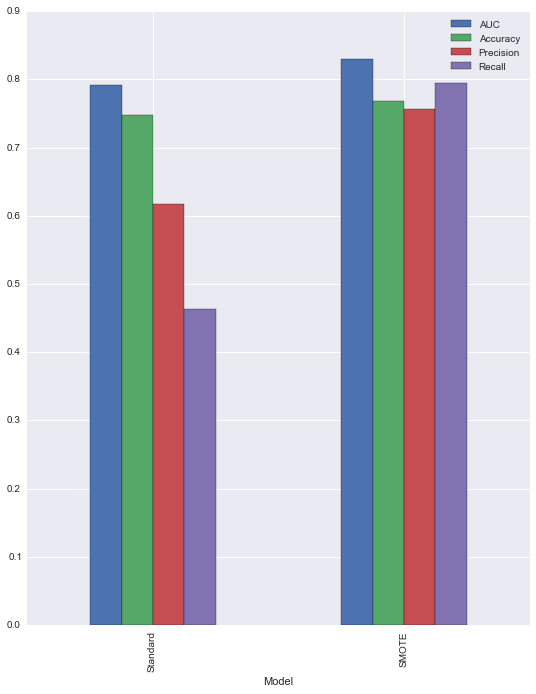

In [44]:
new.plot(kind = 'bar', x = 'Model', figsize = (9, 11))

# 10. Additional Comments

I created two more models, one with the numeric variables standardized and the other with dimensionality reduction using the PCA algorithm. Both performed worse than SMOTE and the results can be seen in the github repository for the capstone project. 

[Link to repository](https://github.com/ScottD61/Thinkful/blob/master/Capstone%20Project/capstone.py)